# Takara Nishizaki

## Research Question: How do Red/Yellow cards affect the satisfaction and excitement of the fans watching the game in the stadium?

I would like to analyze the relationship between penalized cards and how satisfied or excited the fans get. For example, do fans get more excited when there are lot of cards and the game gets heated? I will analyze the relationship by looking at the cards statistic in the dataset, and comparing it with the match excitement statistics in the dataset which is rated out of 10. In addition to this, I will further look into how many fouls each team has commited to see if more fouls lead to an accumulation of cards. To visualize these information, I will make several plots that connect each of the variables that I am looking at, and making a joint plot at the end with the three variables to see the connection between all of the information. 

## **EDA on my dataset**  (Milestone 3, Task 1)

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [10]:
#Downloading necessary dataset for project
df_all = pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,...,18.0,8.0,0.0,0.0,0.0,2,0,0,2,2020
2656,2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,...,19.0,1.0,1.0,0.0,0.0,1,0,0,1,2020
2657,2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,...,13.0,8.0,2.0,0.0,0.0,2,4,4,2,2020
2658,2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,...,9.0,9.0,3.0,0.0,0.0,3,0,0,3,2020


In [12]:
#Looking at the shape and description of the dataset.

print (df_all.shape)
df_all.columns

(2660, 41)


Index(['Unnamed: 0', 'Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored

In [21]:
#Dropping columns that are not necessary for my research, then dropping any NA values.

df_subset = df_all[["Home Team", "Away Team", "Score", "Match Excitement", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards", "Away Team Fouls", "Away Team Yellow Cards", "Away Team Second Yellow Cards", "Away Team Red Cards", "year"]]
df_subset = df_subset.dropna()
df_subset


,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020


In [22]:
print("There were no NA values in this dataset, so we now have a complete dataset with only the columns that are suitable for this research")

There were no NA values in this dataset, so we now have a complete dataset with only the columns that are suitable for this research


In [31]:
#Making a new column for my dataset that helps with my research.

df_subset["Total Fouls"] = df_subset["Home Team Fouls"] + df_subset["Away Team Fouls"]
df_subset["Total Yellow Cards"] = df_subset["Home Team Yellow Cards"] + df_subset["Home Team Second Yellow Cards"] + df_subset["Away Team Yellow Cards"] + df_subset["Away Team Second Yellow Cards"]
df_subset["Total Red Cards"] = df_subset["Home Team Red Cards"] + df_subset["Away Team Red Cards"]

df_subset

,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year,Total Fouls,Total Yellow Cards,Total Red Cards
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014,34.0,6.0,0.0
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014,27.0,4.0,0.0
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014,26.0,2.0,0.0
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014,22.0,3.0,1.0
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014,20.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020,18.0,0.0,0.0
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020,12.0,4.0,0.0
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020,17.0,2.0,0.0
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020,14.0,3.0,0.0


In [32]:
#Setting themes and styles for seaborn.

sns.set_theme(style="ticks")

Text(0, 0.5, 'Match Excitement Rating out of 10')

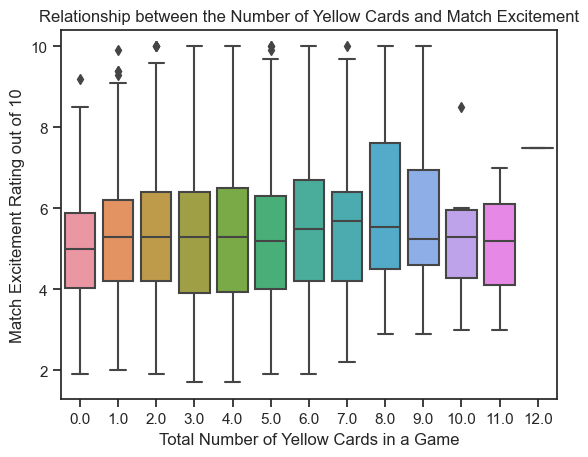

In [41]:
#Boxplot between total yellow cards and match excitement.

sns.boxplot(x='Total Yellow Cards', y='Match Excitement', data=df_subset)
plt.title("Relationship between the Number of Yellow Cards and Match Excitement")
plt.xlabel("Total Number of Yellow Cards in a Game")
plt.ylabel("Match Excitement Rating out of 10")

<AxesSubplot:xlabel='Total Yellow Cards', ylabel='Total Fouls'>

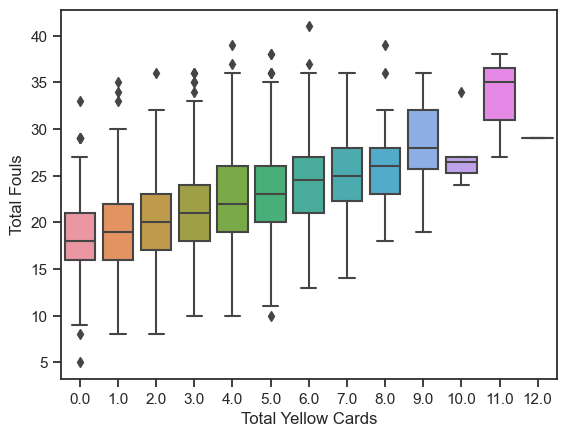

In [44]:
#Plot between total fouls and total yellow cards.

sns.boxplot(x='Total Yellow Cards', y='Total Fouls', data=df_subset)

(4.5, 6.0)

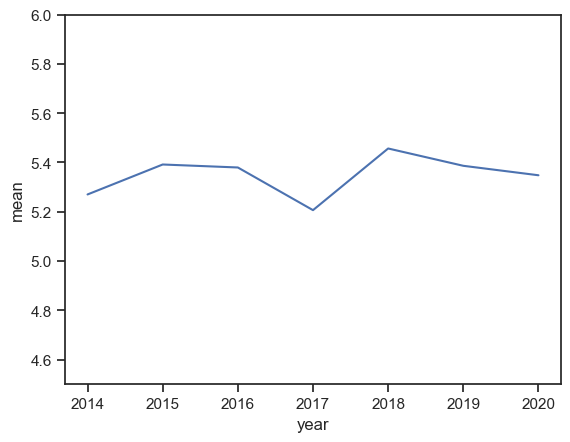

In [112]:
#Average match excitement rate by Year

mean_Excitement = df_subset.groupby('year')['Match Excitement'].mean()
mean_Excitement_df = mean_Excitement.to_frame().reset_index()
mean_Excitement_df.columns=["year", "mean"]
sns.lineplot(x='year', y='mean', data=mean_Excitement_df, markers=True)
plt.ylim([4.5,6])

(2.5, 4.0)

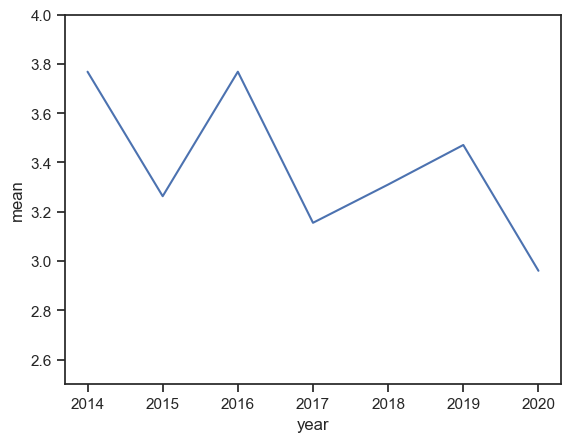

In [114]:
#Average cards given out by Year

mean_Yellow_Cards = df_subset.groupby('year')['Total Yellow Cards'].mean()
mean_Yellow_Cards_df = mean_Yellow_Cards.to_frame().reset_index()
mean_Yellow_Cards_df.columns=["year", "mean"]
sns.lineplot(x='year', y='mean', data=mean_Yellow_Cards_df, markers=True)
plt.ylim([2.5,4])